In [89]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
!ls

41592_2017_BFnmeth4184_MOESM263_ESM.zip ROC_LLT_30.tsv
Accuracy.tsv                            ROC_LLT_40.tsv
Accuracy_range_LLT_20.tsv               ROC_curve.html
Accuracy_range_LLT_20_50000.tsv         ROC_curve.ipynb
Accuracy_range_LLT_20_method2.tsv       accuracy.png
Accuracy_range_LLT_20_method2_50000.tsv accuracy_method2.png
Accuracy_range_LLT_30.tsv               ll_distribution.png
Accuracy_range_LLT_30_50000.tsv         log_likelihood_distrib_test.png
Accuracy_range_LLT_30_method2.tsv       native
Accuracy_range_LLT_30_method2_50000.tsv neg_ctrl
Accuracy_range_LLT_40.tsv               neg_ctrl_ll.png
Accuracy_range_LLT_40_50000.tsv         pos_ctrl
Accuracy_range_LLT_40_method2.tsv       pos_ctrl_ll.png
Accuracy_range_LLT_40_method2_50000.tsv roc_40ll.png
Code                                    roc_40ll_good.png
ROC.tsv                                 roc_test.png
ROC_LLT_20.tsv


In [90]:
#define function to call sites
def calls(llr, llt, sample_type, fp, tn, tp, fn):
    if llr > llt and sample_type == 'neg_ctrl':
        fp += 1
    elif llr < llt and sample_type == 'neg_ctrl':
        tn += 1
    elif llr > llt and sample_type == 'pos_ctrl':
        tp += 1
    elif llr < llt and sample_type == 'pos_ctrl':
        fn += 1
    return fp,tn,tp, fn

In [91]:
#list control files
neg_ctrl = !ls neg_ctrl/*.txt
pos_ctrl = !ls pos_ctrl/*.txt

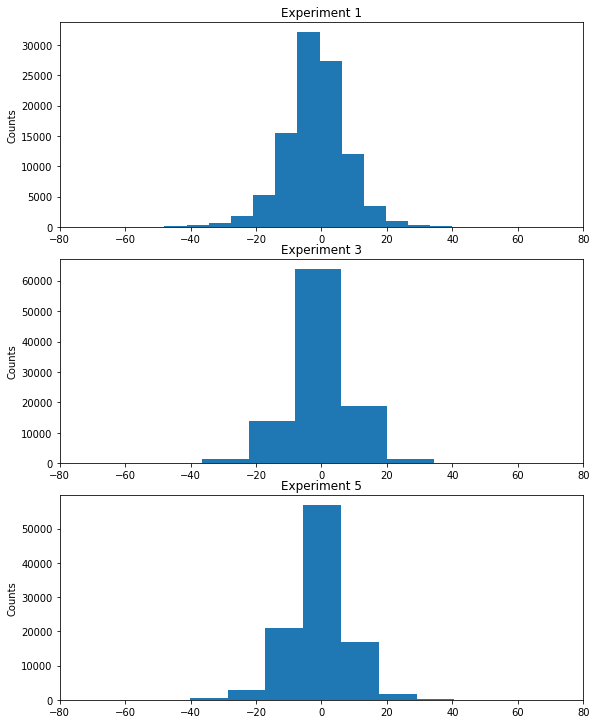

In [61]:
#open files and make random drawing from positive and negative control
neg_exp1 = neg_ctrl[0]
f = pd.read_csv(neg_exp1,sep='\t', header=None)
f1 = f.sample(n = 50000)
f1.insert(1,'Label','neg_ctrl')
pos_exp1 = pos_ctrl[0]
f = pd.read_csv(pos_exp1,sep='\t', header=None)
f2 = f.sample(n = 50000)
f2.insert(1,'Label','pos_ctrl')
df_merge_exp1 = pd.concat([f1,f2],axis=0)
neg_exp3 = neg_ctrl[1]
f = pd.read_csv(neg_exp3,sep='\t', header=None)
f1 = f.sample(n = 50000)
f1.insert(1,'Label','neg_ctrl')
pos_exp3 = pos_ctrl[1]
f = pd.read_csv(pos_exp3,sep='\t', header=None)
f2 = f.sample(n = 50000)
f2.insert(1,'Label','pos_ctrl')
df_merge_exp3 = pd.concat([f1,f2],axis=0)
neg_exp5 = neg_ctrl[2]
f = pd.read_csv(neg_exp5,sep='\t', header=None)
f1 = f.sample(n = 50000)
f1.insert(1,'Label','neg_ctrl')
pos_exp5 = pos_ctrl[2]
f = pd.read_csv(pos_exp5,sep='\t', header=None)
f2 = f.sample(n = 50000)
f2.insert(1,'Label','pos_ctrl')
df_merge_exp5 = pd.concat([f1,f2],axis=0)
list_files = [df_merge_exp1,df_merge_exp3,df_merge_exp5]
titles = ['Experiment 1','Experiment 3','Experiment 5']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))
fig.tight_layout()
c = 0
while c < len(list_files):
    axes[c].hist(list_files[c][5].values,bins=50)
    axes[c].set_ylabel("Counts")
    #axes[c].set_xlabel("Log-likelihood")
    axes[c].set_xlim(-80,80)
    axes[c].set_title(titles[c])
    c += 1

In [92]:
#test different ranges of log-likelihood on exp1
bv = (df_merge_exp5[5]> -40) & (df_merge_exp5[5] < 40)
bv_1 = (df_merge_exp5[5]> -30) & (df_merge_exp5[5] < 30)
bv_2 = (df_merge_exp5[5]> -20) & (df_merge_exp5[5] < 20)

In [93]:
#remove outliers
df_merge_exp5_0 = df_merge_exp5[bv]
df_merge_exp5_1 = df_merge_exp5[bv_1]
df_merge_exp5_2 = df_merge_exp5[bv_2]

In [94]:
#check dimension of the data frames
print(df_merge_exp5_0.shape)
print(df_merge_exp5_1.shape)
print(df_merge_exp5_2.shape)

(99852, 12)
(99263, 12)
(96542, 12)


In [ ]:
#precision = float(tp) / (tp + fp)
#true positive rate = float(tp) / (tp + fn)
#specificity = float(tn) / (tn + fp)
#false positive rate = float(fp) / fp + tn
#If LL(NC) > threshold → FP
#If LL (NC) < threshold → TN
#If LL (PC) > threshold → TP
#If LL (PC < threshold → FN

In [95]:
#test on dataframe between -40 and 40 log-likelihood
fp = 0
tn = 0
tp = 0
fn = 0
llt = -40
tpr_list = []
fpr_list = []
llt_list = [-40]
accuracy_roc = []
while llt <= 40:
    for i in df_merge_exp5_0.iterrows():
        llr = i[1][5]
        sample_type = i[1]['Label']
        fp,tn,tp,fn = calls(llr, llt, sample_type, fp,tn,tp,fn)
    fpr = float(fp) / (fp + tn)
    tpr = float(tp) / (tp + fn)
    acc = (float(tp) + float(tn))/(fp + tn + tp + fn)
    accuracy_roc.append(acc)
    print(acc,llt)
    fp = 0
    tn = 0
    tp = 0
    fn = 0
    tpr_list.append(tpr)
    fpr_list.append(fpr)
    llt += 0.25
    llt_list.append(llt)

0.5002904298361576 -40
0.5003104594800305 -39.75
0.5003955894282481 -39.5
0.5004606818090774 -39.25
0.5005508152065057 -39.0
0.5005908744942515 -38.75
0.5006209189600609 -38.5
0.5007060520175061 -38.25
0.5007561266286767 -38.0
0.5008312302207267 -37.75
0.5009013339742819 -37.5
0.501031526659456 -37.25
0.5011016304130113 -37.0
0.5011517045226936 -36.75
0.5011867682847443 -36.5
0.5012618675639947 -36.25
0.5013720306052959 -36.0
0.5014120898930418 -35.75
0.5014922084685335 -35.5
0.501562343515273 -35.25
0.5016824900853263 -35.0
0.501762608660818 -34.75
0.5018827865240556 -34.5
0.5019729199214839 -34.25
0.5021131274285944 -34.0
0.5021732163602132 -33.75
0.5022734101151728 -33.5
0.502343468333133 -33.25
0.5024436165524977 -33.0
0.5025537795937989 -32.75
0.5026389320086929 -32.5
0.502814164964147 -32.25
0.5029293647534827 -32.0
0.5029844169370669 -31.75
0.5030845651564315 -31.5
0.5032548171293515 -31.25
0.5034250691022714 -31.0
0.5035953210751913 -30.75
0.5037505883766813 -30.5
0.50400592877

In [96]:
fp = 0
tn = 0
tp = 0
fn = 0
llt = 0
llt_accuracy = [0,10]
tpr_list_2 = []
fpr_list_2 = []
llt_list_2 = [0]
accuracy_roc_2 = []
while llt <= 10:
    df_merge_filt = df_merge_exp1_0[abs(df_merge_exp1_0[5])> llt]
    for i in df_merge_filt.iterrows():
        llr = i[1][5]
        sample_type = i[1]['Label']
        fp,tn,tp,fn = calls(llr, llt, sample_type, fp,tn,tp,fn)
    fpr = float(fp) / (fp + tn)
    tpr = float(tp) / (tp + fn)
    acc = (float(tp) + float(tn))/(fp + tn + tp + fn)
    accuracy_roc_2.append(acc)
    print(acc,llt)
    fp = 0
    tn = 0
    tp = 0
    fn = 0
    tpr_list_2.append(tpr)
    fpr_list_2.append(fpr)
    llt += 0.25
    llt_list_2.append(llt)

0.8232390126429862 0
0.8323685081045319 0.25
0.8399404825167393 0.5
0.8463085194737072 0.75
0.8520779104209676 1.0
0.8570539705950131 1.25
0.8617435678850093 1.5
0.8650302270985635 1.75
0.8684951389497129 2.0
0.8711405248113717 2.25
0.8733400482413126 2.5
0.8753774474306248 2.75
0.8775409582036148 3.0
0.8789289871944121 3.25
0.8806125214563194 3.5
0.8822026637588597 3.75
0.8832097969706736 4.0
0.8844986323303756 4.25
0.8857621614151465 4.5
0.8866543808484372 4.75
0.8880144042470254 5.0
0.8886899605351815 5.25
0.889466736008321 5.5
0.8897367655008941 5.75
0.8908024838269976 6.0
0.8915678909606172 6.25
0.892495734885134 6.5
0.8929727624564905 6.75
0.8941773436508943 7.0
0.8951915455746368 7.25
0.895441180511665 7.5
0.8959529276693455 7.75
0.8966725568300937 8.0
0.8971715157934085 8.25
0.8971352474990256 8.5
0.8975723876042585 8.75
0.8975183823529411 9.0
0.8969136711844431 9.25
0.8974378673222448 9.5
0.8982792507320204 9.75
0.8985283050422276 10.0


In [97]:
df_accuracy = pd.concat([pd.Series(accuracy_roc),pd.Series(llt_list)],axis=1)
df_accuracy.columns = ['Accuracy','LLT']
fpr_list.reverse()
tpr_list.reverse()
llt_list.reverse()
df_roc = pd.concat([pd.Series(fpr_list),pd.Series(tpr_list), pd.Series(llt_list)],axis=1)
df_roc.columns = ['FPR','TPR','LLT']
df_accuracy.to_csv("Accuracy_range_LLT_40_exp3_50000.tsv",sep='\t',header=True,index=None)
df_roc.to_csv("ROC_LLT_40_exp5.tsv",sep='\t',header=True,index=None)
df_accuracy_method2 = pd.concat([pd.Series(accuracy_roc_2),pd.Series(llt_list_2)],axis=1)
df_accuracy_method2.columns = ['Accuracy','LLT']
df_accuracy_method2.to_csv("Accuracy_range_LLT_40_method2_exp3_50000.tsv",sep='\t',header=True,index=None)

Text(0, 0.5, 'Accuracy')

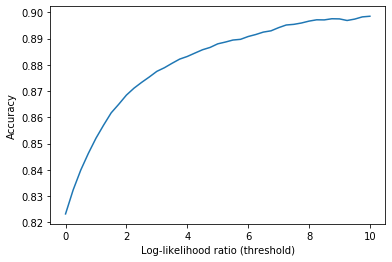

In [98]:
#plot accuracy calculated as (TP + TN)/calls where calls are those with abs(llr)> threshold
plt.plot(df_accuracy_method2['LLT'],df_accuracy_method2['Accuracy'],)
plt.xlabel("Log-likelihood ratio (threshold)")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

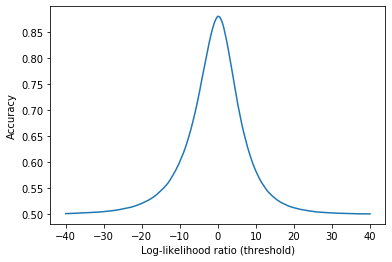

In [99]:
#plot accuracy calculated as (TP + TN)/calls where calls are all 200k sites
plt.plot(df_accuracy['LLT'],df_accuracy['Accuracy'],)
plt.xlabel("Log-likelihood ratio (threshold)")
plt.ylabel("Accuracy")

In [100]:
#calculate AUC on ROC curve obtained changin LLR from -40 to 40 with step 0.25
import numpy as np
from sklearn import metrics
metrics.auc(fpr_list, tpr_list)

0.9370146769215185

Text(0.5, 1.0, 'ROC curve on 100K random mitochondrial sites. Lt range -40 to 40')

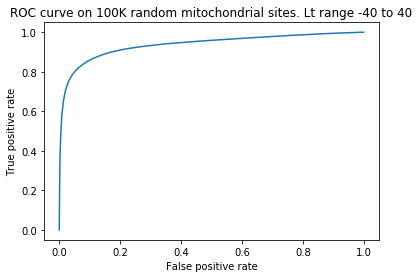

In [101]:
#plot ROC curve obtained changin LLR from -40 to 40 with step 0.25
plt.plot(fpr_list,tpr_list)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve on 100K random mitochondrial sites. Lt range -40 to 40")

In [102]:
#test on dataframe within -30 and 30 log-likelihood
fp = 0
tn = 0
tp = 0
fn = 0
llt = -30
tpr_list = []
fpr_list = []
llt_list = [-30]
accuracy_roc = []
while llt <= 30:
    for i in df_merge_exp5_1.iterrows():
        llr = i[1][5]
        sample_type = i[1]['Label']
        fp,tn,tp,fn = calls(llr, llt, sample_type, fp,tn,tp,fn)
    fpr = float(fp) / (fp + tn)
    tpr = float(tp) / (tp + fn)
    acc = (float(tp) + float(tn))/(fp + tn + tp + fn)
    accuracy_roc.append(acc)
    print(acc,llt)
    fp = 0
    tn = 0
    tp = 0
    fn = 0
    tpr_list.append(tpr)
    fpr_list.append(fpr)
    llt += 0.25
    llt_list.append(llt)

0.5013449120014507 -30
0.5015060999566807 -29.75
0.5016521931857105 -29.5
0.5018083273727371 -29.25
0.5019392925863615 -29.0
0.5021307032831972 -28.75
0.5023321882272347 -28.5
0.5025740220227481 -28.25
0.5028258832774202 -28.0
0.5030727382631472 -27.75
0.5033194644530188 -27.5
0.5035763937861417 -27.25
0.5037577320626222 -27.0
0.5040145875099483 -26.75
0.5043420442868368 -26.5
0.5045585968588497 -26.25
0.5049917894885305 -26.0
0.5053646447245141 -25.75
0.50563665487956 -25.5
0.5060143861699341 -25.25
0.5063418663926417 -25.0
0.5067346342544553 -24.75
0.5070318953879631 -24.5
0.5074705058585288 -24.25
0.5078832572712344 -24.0
0.5082911889746328 -23.75
0.5087749345154141 -23.5
0.5091476929276647 -23.25
0.509484903740568 -23.0
0.5099791450477045 -22.75
0.5105180438856314 -22.5
0.5109611122305058 -22.25
0.511590888483664 -22.0
0.512225591634008 -21.75
0.5128649432814169 -21.5
0.5136659916785041 -21.25
0.5143611287413989 -21.0
0.5150315339821475 -20.75
0.5158271206931292 -20.5
0.51648196655

In [103]:
#test positive thresholds on subset of sites with absolute llr > threshold
fp = 0
tn = 0
tp = 0
fn = 0
llt = 0
llt_accuracy = [0,10]
tpr_list_2 = []
fpr_list_2 = []
llt_list_2 = [0]
accuracy_roc_2 = []
while llt <= 10:
    df_merge_filt = df_merge_exp1_1[abs(df_merge_exp1_1[5])> llt]
    for i in df_merge_filt.iterrows():
        llr = i[1][5]
        sample_type = i[1]['Label']
        fp,tn,tp,fn = calls(llr, llt, sample_type, fp,tn,tp,fn)
    fpr = float(fp) / (fp + tn)
    tpr = float(tp) / (tp + fn)
    acc = (float(tp) + float(tn))/(fp + tn + tp + fn)
    accuracy_roc_2.append(acc)
    print(acc,llt)
    fp = 0
    tn = 0
    tp = 0
    fn = 0
    tpr_list_2.append(tpr)
    fpr_list_2.append(fpr)
    llt += 0.25
    llt_list_2.append(llt)

0.822351310050297 0
0.8315343782915663 0.25
0.8391514644530956 0.5
0.8455565237533228 0.75
0.8513609950045876 1.0
0.8563665770703157 1.25
0.861084533320576 1.5
0.8643871982695049 1.75
0.8678706022207047 2.0
0.8705268227912365 2.25
0.8727331215569585 2.5
0.8747753725360096 2.75
0.8769461077844312 3.0
0.8783315898811015 3.25
0.8800158616377141 3.5
0.8816063648418261 3.75
0.882606635845327 4.0
0.8838924698438478 4.25
0.8851527848389755 4.5
0.8860366252452584 4.75
0.8873948628974465 5.0
0.8880582410270461 5.25
0.8888233259405457 5.5
0.8890723220521938 5.75
0.8901304769461342 6.0
0.8908836612097033 6.25
0.8918029660006676 6.5
0.8922606620936475 6.75
0.8934609002281684 7.0
0.8944680161068022 7.25
0.8946939005176683 7.5
0.8951843026505457 7.75
0.8958883903878065 8.0
0.8963685810270356 8.25
0.8962960488961624 8.5
0.8967082067930324 8.75
0.896614554863161 9.0
0.8959513400494202 9.25
0.8964504089573573 9.5
0.8972761999667829 9.75
0.8974903558580035 10.0


In [104]:
df_accuracy = pd.concat([pd.Series(accuracy_roc),pd.Series(llt_list)],axis=1)
df_accuracy.columns = ['Accuracy','LLT']
fpr_list.reverse()
tpr_list.reverse()
llt_list.reverse()
df_roc = pd.concat([pd.Series(fpr_list),pd.Series(tpr_list), pd.Series(llt_list)],axis=1)
df_roc.columns = ['FPR','TPR','LLT']
df_accuracy.to_csv("Accuracy_range_LLT_30_exp5_50000.tsv",sep='\t',header=True,index=None)
df_roc.to_csv("ROC_LLT_30_exp5.tsv",sep='\t',header=True,index=None)
df_accuracy_method2 = pd.concat([pd.Series(accuracy_roc_2),pd.Series(llt_list_2)],axis=1)
df_accuracy_method2.columns = ['Accuracy','LLT']
df_accuracy_method2.to_csv("Accuracy_range_LLT_30_method2_exp5_50000.tsv",sep='\t',header=True,index=None)

In [105]:
#calculate AUC on ROC curve obtained changin LLR from -40 to 40 with step 0.25
import numpy as np
from sklearn import metrics
metrics.auc(fpr_list, tpr_list)

0.9364862375039925

Text(0, 0.5, 'Accuracy')

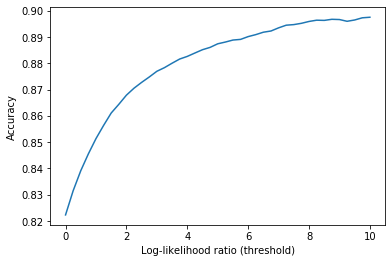

In [106]:
#plot accuracy calculated as (TP + TN)/calls where calls are those with abs(llr)> threshold
plt.plot(df_accuracy_method2['LLT'],df_accuracy_method2['Accuracy'],)
plt.xlabel("Log-likelihood ratio (threshold)")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

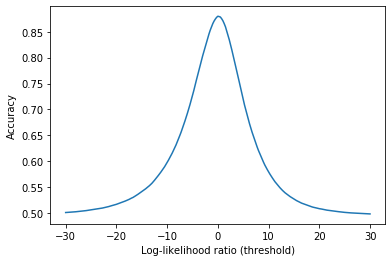

In [107]:
#plot accuracy calculated as (TP + TN)/calls where calls are all 200k sites
plt.plot(df_accuracy['LLT'],df_accuracy['Accuracy'],)
plt.xlabel("Log-likelihood ratio (threshold)")
plt.ylabel("Accuracy")

Text(0.5, 1.0, 'ROC curve on 100K random mitochondrial sites. Lt range -30 to 30')

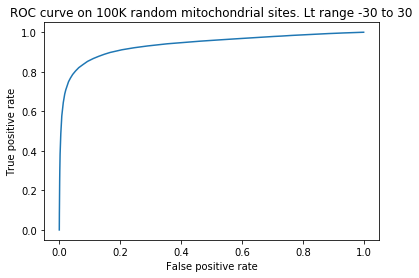

In [108]:
#plot ROC curve obtained changin LLR from -30 to 30 with step 0.25
plt.plot(fpr_list,tpr_list)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve on 100K random mitochondrial sites. Lt range -30 to 30")

In [109]:
#test on dataframe within -20 and 20 log-likelihood
fp = 0
tn = 0
tp = 0
fn = 0
llt = -20
tpr_list = []
fpr_list = []
llt_list = [-20]
accuracy_roc = []
while llt <= 20:
    for i in df_merge_exp5_2.iterrows():
        llr = i[1][5]
        sample_type = i[1]['Label']
        fp,tn,tp,fn = calls(llr, llt, sample_type, fp,tn,tp,fn)
    fpr = float(fp) / (fp + tn)
    tpr = float(tp) / (tp + fn)
    acc = (float(tp) + float(tn))/(fp + tn + tp + fn)
    accuracy_roc.append(acc)
    print(acc,llt)
    fp = 0
    tn = 0
    tp = 0
    fn = 0
    tpr_list.append(tpr)
    fpr_list.append(fpr)
    llt += 0.25
    llt_list.append(llt)

0.5042986472208987 -20
0.5052155087581185 -19.75
0.505946091532517 -19.5
0.5069090532421794 -19.25
0.5078207545215355 -19.0
0.508695967432851 -18.75
0.5096645880378711 -18.5
0.510824752947026 -18.25
0.5119073515854025 -18.0
0.5127772195692932 -17.75
0.5141034007686173 -17.5
0.5155231889612879 -17.25
0.5167502278942571 -17.0
0.5178168182477366 -16.75
0.5192628427584349 -16.5
0.5209405914953126 -16.25
0.5224998446143327 -16.0
0.5242095885302284 -15.75
0.5259712006630063 -15.5
0.5276367855145124 -15.25
0.5295964032652385 -15.0
0.5313872544957322 -14.75
0.5331551522308896 -14.5
0.5349832180002486 -14.25
0.5371922228322232 -14.0
0.5391555656839794 -13.75
0.541188414204616 -13.5
0.5435541513440721 -13.25
0.5459979694590059 -13.0
0.548792110388265 -12.75
0.5518409547686633 -12.5
0.5549063484170396 -12.25
0.5579923339894334 -12.0
0.5613157213157213 -11.75
0.5645746135676101 -11.5
0.5679892261473117 -11.25
0.571526245454828 -11.0
0.5752273810263742 -10.75
0.5788225056201892 -10.5
0.583057063528

In [113]:
#test positive thresholds on subset of sites with absolute llr > threshold
fp = 0
tn = 0
tp = 0
fn = 0
llt = 0
llt_accuracy = [0,10]
tpr_list_2 = []
fpr_list_2 = []
llt_list_2 = [0]
accuracy_roc_2 = []
while llt <= 10:
    df_merge_filt = df_merge_exp5_2[abs(df_merge_exp5_2[5])> llt]
    for i in df_merge_filt.iterrows():
        llr = i[1][5]
        sample_type = i[1]['Label']
        fp,tn,tp,fn = calls(llr, llt, sample_type, fp,tn,tp,fn)
    fpr = float(fp) / (fp + tn)
    tpr = float(tp) / (tp + fn)
    acc = (float(tp) + float(tn))/(fp + tn + tp + fn)
    accuracy_roc_2.append(acc)
    print(acc,llt)
    fp = 0
    tn = 0
    tp = 0
    fn = 0
    tpr_list_2.append(tpr)
    fpr_list_2.append(fpr)
    llt += 0.25
    llt_list_2.append(llt)

0.8771847981588605 0
0.8888280981805698 0.25
0.898874539357923 0.5
0.9074600618912222 0.75
0.9152300712896954 1.0
0.9210839713209381 1.25
0.92672775820787 1.5
0.930725114249835 1.75
0.9347029398389642 2.0
0.9378745311872898 2.25
0.9405707729815 2.5
0.942983303846211 2.75
0.9451949054419143 3.0
0.9468499831549901 3.25
0.9482537086788927 3.5
0.9494163424124513 3.75
0.9505022169939372 4.0
0.9515945976620134 4.25
0.9522255838326313 4.5
0.9527109746228706 4.75
0.9535404970187579 5.0
0.9540088145966066 5.25
0.9547076716725348 5.5
0.9552024576954069 5.75
0.9554135080165879 6.0
0.9559432206450179 6.25
0.9558909218039856 6.5
0.9563990924143007 6.75
0.9565343378730803 7.0
0.9569158688123854 7.25
0.9576855723526679 7.5
0.9578979137586298 7.75
0.9585006161306993 8.0
0.9583507743825869 8.25
0.9585699819486637 8.5
0.9593318133172025 8.75
0.9595213473186586 9.0
0.9600832682799896 9.25
0.9604128918904079 9.5
0.9605102928385039 9.75
0.9611145131659522 10.0


In [114]:
#calculate AUC on ROC curve obtained changin LLR from -40 to 40 with step 0.25
import numpy as np
from sklearn import metrics
metrics.auc(fpr_list, tpr_list)

0.9343946815341144

In [115]:
df_accuracy = pd.concat([pd.Series(accuracy_roc),pd.Series(llt_list)],axis=1)
df_accuracy.columns = ['Accuracy','LLT']
fpr_list.reverse()
tpr_list.reverse()
llt_list.reverse()
df_roc = pd.concat([pd.Series(fpr_list),pd.Series(tpr_list), pd.Series(llt_list)],axis=1)
df_roc.columns = ['FPR','TPR','LLT']
df_accuracy.to_csv("Accuracy_range_LLT_20_50000_exp5.tsv",sep='\t',header=True,index=None)
df_roc.to_csv("ROC_LLT_20_exp5.tsv",sep='\t',header=True,index=None)
df_accuracy_method2 = pd.concat([pd.Series(accuracy_roc_2),pd.Series(llt_list_2)],axis=1)
df_accuracy_method2.columns = ['Accuracy','LLT']
df_accuracy_method2.to_csv("Accuracy_range_LLT_20_method2_50000_exp5.tsv",sep='\t',header=True,index=None)

Text(0, 0.5, 'Accuracy')

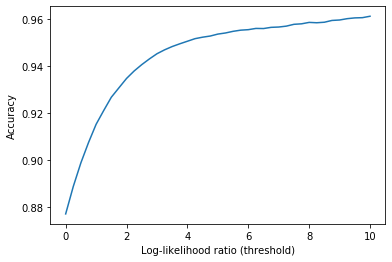

In [116]:
#plot accuracy calculated as (TP + TN)/calls where calls are those with abs(llr)> threshold
plt.plot(df_accuracy_method2['LLT'],df_accuracy_method2['Accuracy'],)
plt.xlabel("Log-likelihood ratio (threshold)")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

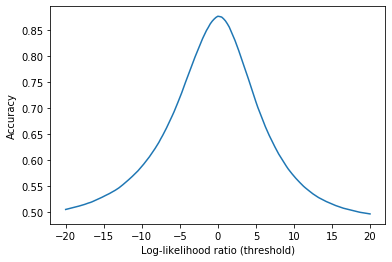

In [117]:
#plot accuracy calculated as (TP + TN)/calls where calls are all 200k sites
plt.plot(df_accuracy['LLT'],df_accuracy['Accuracy'],)
plt.xlabel("Log-likelihood ratio (threshold)")
plt.ylabel("Accuracy")

Text(0.5, 1.0, 'ROC curve on 100K random mitochondrial sites. Lt range -20 to 20')

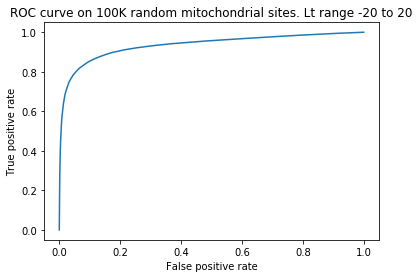

In [118]:
#plot ROC curve obtained changin LLR from -20 to 20 with step 0.25
plt.plot(fpr_list,tpr_list)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve on 100K random mitochondrial sites. Lt range -20 to 20")

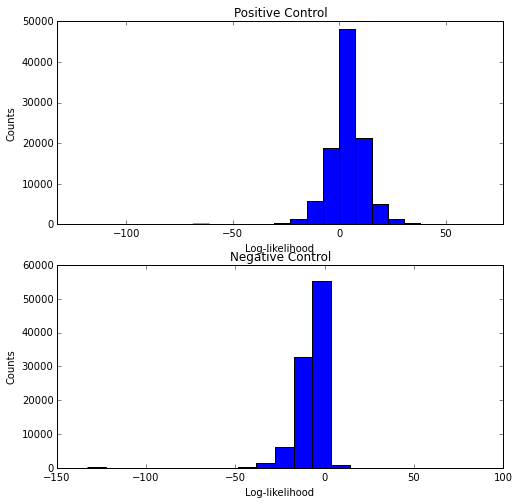

In [88]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
axes[0].hist(f1[5].values,bins=20)
axes[0].set_ylabel("Counts")
axes[0].set_xlabel("Log-likelihood")
axes[0].set_title("Positive Control")
axes[0].set_xlim(f3[5].min(),f3[5].max())
axes[1].hist(f3[5].values,bins=20)
axes[1].set_ylabel("Counts")
axes[1].set_xlabel("Log-likelihood")
axes[1].set_title("Negative Control")

In [90]:
sum(f3[5]<-50)

73

In [91]:
f3[5].shape

(96881,)

In [5]:
!ls

ROC_curve.ipynb                 neg_ctrl_ll.png
log_likelihood_distrib_test.png pos_ctrl
native                          pos_ctrl_ll.png
neg_ctrl                        roc_test.png


In [8]:
!ls native

exp_2_barcode01_meth_calls.tsv exp_4_barcode10_meth_calls.tsv
exp_3_barcode10_meth_calls.tsv native


In [9]:
ls -ltr

total 256
drwxr-xr-x  9 Claudia  staff    288 25 Mar 18:27 neg_ctrl/
drwxr-xr-x  9 Claudia  staff    288 25 Mar 18:27 pos_ctrl/
-rw-r--r--@ 1 Claudia  staff  14491  3 Apr 17:09 roc_test.png
-rw-r--r--@ 1 Claudia  staff   7734  3 Apr 18:32 pos_ctrl_ll.png
-rw-r--r--@ 1 Claudia  staff   7925  3 Apr 18:32 neg_ctrl_ll.png
-rw-r--r--@ 1 Claudia  staff  14975  3 Apr 18:38 log_likelihood_distrib_test.png
-rw-r--r--  1 Claudia  staff  78363  6 Apr 12:25 ROC_curve.ipynb
drwxr-xr-x  6 Claudia  staff    192  6 Apr 12:26 native/


In [10]:
cd native

/Users/Claudia/Documents/mitochondria/Nanopore/native


exp_2_barcode01_meth_calls.tsv*    exp_3_barcode10_meth_calls_MT.tsv
exp_2_barcode01_meth_calls_MT.tsv  exp_4_barcode10_meth_calls.tsv*
exp_3_barcode10_meth_calls.tsv*    exp_4_barcode10_meth_calls_MT.tsv


In [34]:
ls -ltr

total 304
drwxr-xr-x  9 Claudia  staff     288 25 Mar 18:27 neg_ctrl/
drwxr-xr-x  9 Claudia  staff     288 25 Mar 18:27 pos_ctrl/
-rw-r--r--@ 1 Claudia  staff   14491  3 Apr 17:09 roc_test.png
-rw-r--r--@ 1 Claudia  staff    7734  3 Apr 18:32 pos_ctrl_ll.png
-rw-r--r--@ 1 Claudia  staff    7925  3 Apr 18:32 neg_ctrl_ll.png
-rw-r--r--@ 1 Claudia  staff   14975  3 Apr 18:38 log_likelihood_distrib_test.png
drwxr-xr-x  8 Claudia  staff     256  6 Apr 12:44 native/
-rw-r--r--  1 Claudia  staff  104892  6 Apr 13:25 ROC_curve.ipynb


In [56]:
files = !ls native/*MT.tsv

In [59]:
neg_ctrl = !ls neg_ctrl/*
pos_ctrl = !ls pos_ctrl/*

In [60]:
neg_ctrl = neg_ctrl[2]
pos_ctrl = pos_ctrl[2]
native1 = files[0]
native2 = files[1]
native3 = files[2]
neg = pd.read_csv(neg_ctrl, sep='\t',header=None)
neg = neg.sample(frac=0.02)
pos = pd.read_csv(pos_ctrl, sep='\t',header=None)
pos = pos.sample(frac=0.02)
native1 = pd.read_csv(native1,sep='\t', header=None)
native1 = native1.sample(frac = 0.02)
native2 = pd.read_csv(native2,sep='\t', header=None)
native2 = native2.sample(frac = 0.02)
native3 = pd.read_csv(native3,sep='\t', header=None)
native3 = native3.sample(frac = 0.02)
list_files = [neg,pos,native1,native2,native3]

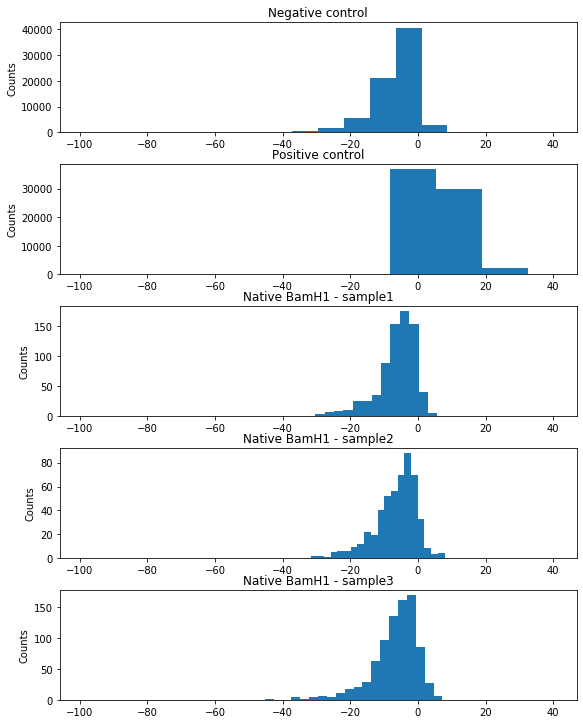

In [75]:
titles = ['Negative control','Positive control','Native BamH1 - sample1','Native BamH1 - sample2', 'Native BamH1 - sample3']
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 10))
fig.tight_layout()
minv = neg[5].min()
maxv = neg[5].max()
c = 0
while c < len(list_files):
    axes[c].hist(list_files[c][5].values,bins=20)
    axes[c].set_ylabel("Counts")
    #axes[c].set_xlabel("Log-likelihood")
    axes[c].set_xlim(minv,maxv)
    axes[c].set_title(titles[c])
    c += 1

In [90]:
sum(neg[5]<-40)

176

In [91]:
neg.shape

(72369, 11)

In [58]:
abs(40)>10

True